In [1]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from citipy import citipy
import gmaps

# Import API key
from config import api_key, gkey

Cities List Generation

In [2]:
# Lists holding coordinates and cities
coordinates = []
cities = []

# Create a set of random lat and lon combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
lon = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lat, lon)

# Identify nearest city for each lat, lon combination
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    
    city = citipy.nearest_city(lat, lon).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

API Call for weather info

In [3]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Will keep the count of records
record = 1

# Log file print statement
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through the cities in the city list
for city in cities:


    try:
        # API request
        response = requests.get(f"{url}&q={city}").json()
        
        # Append the data to lists
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        city_record = response["name"]

        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")

        # Increase counter by one
        record= record + 1

        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)

    except:
        print("City not found. Skipping...")

print("Data Retrieval Complete")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=port%20alfred
Processing Record 2 | Zemio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=zemio
Processing Record 3 | Road Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=road%20town
Processing Record 4 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=hobart
Processing Record 5 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=geraldton
Processing Record 6 | Banda Aceh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=banda%20aceh
Processing Record 7 | East London
http://api.openweathermap.org/data/2.5/we

City not found. Skipping...
Processing Record 56 | Palu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=palu
Processing Record 57 | San Jeronimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=san%20jeronimo
Processing Record 58 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=san%20patricio
Processing Record 59 | Kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=kodiak
Processing Record 60 | Srandakan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=srandakan
Processing Record 61 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=mar%20del%20plata
Processing Record 62 | Nabire
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 112 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=mount%20isa
Processing Record 113 | Isla Vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=isla%20vista
Processing Record 114 | Fort Frances
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=fort%20frances
Processing Record 115 | Emba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=emba
Processing Record 116 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=airai
Processing Record 117 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=tasiilaq
Processing Record 118 | Hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e9330

Processing Record 168 | Hoa Binh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=hoa%20binh
Processing Record 169 | Coari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=coari
Processing Record 170 | Makakilo City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=makakilo%20city
Processing Record 171 | Alugan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=alugan
Processing Record 172 | Deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=deputatskiy
Processing Record 173 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=arraial%20do%20cabo
Processing Record 174 | Taonan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a

Processing Record 223 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=upernavik
Processing Record 224 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=port%20macquarie
Processing Record 225 | Traralgon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=traralgon
Processing Record 226 | Escanaba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=escanaba
Processing Record 227 | Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=wells
Processing Record 228 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=iqaluit
Processing Record 229 | Sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1

Processing Record 278 | Rabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=rabat
Processing Record 279 | Gweru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=gweru
Processing Record 280 | Clinton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=clinton
Processing Record 281 | La Romana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=la%20romana
Processing Record 282 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=provideniya
Processing Record 283 | Inhambane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=inhambane
Processing Record 284 | Cockburn Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304

Processing Record 333 | Natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=natal
Processing Record 334 | Huilong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=huilong
Processing Record 335 | Marapanim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=marapanim
Processing Record 336 | Sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=sabang
Processing Record 337 | Miraflores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=miraflores
Processing Record 338 | Kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=kulhudhuffushi
Processing Record 339 | Tabuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304

Processing Record 388 | Berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=berlevag
City not found. Skipping...
Processing Record 389 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=touros
Processing Record 390 | Zhangye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=zhangye
Processing Record 391 | Hare Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=hare%20bay
Processing Record 392 | Wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=wanning
Processing Record 393 | Chara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=chara
Processing Record 394 | Yenangyaung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a5408617

Processing Record 444 | Naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=naze
Processing Record 445 | Baherden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=baherden
Processing Record 446 | Sarahan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=sarahan
Processing Record 447 | Prince Albert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=prince%20albert
Processing Record 448 | Bone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=bone
Processing Record 449 | North Bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=north%20bend
Processing Record 450 | Panzhihua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e9330408

Processing Record 499 | Druskininkai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=druskininkai
City not found. Skipping...
Processing Record 500 | Stolin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=stolin
Processing Record 501 | Roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=roald
Processing Record 502 | Joshimath
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=joshimath
Processing Record 503 | Careiro da Varzea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=careiro%20da%20varzea
Processing Record 504 | Kongolo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=kongolo
Processing Record 505 | Lages
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 555 | Rio Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=rio%20grande
Processing Record 556 | Pimenta Bueno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=pimenta%20bueno
Processing Record 557 | Oksfjord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=oksfjord
Processing Record 558 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=palmer
City not found. Skipping...
Processing Record 559 | Magadan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=magadan
Processing Record 560 | Linxia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c0a54086176436f7a5f1e93304087278&q=linxia
Processing Record 561 | Marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

In [10]:
# Creating a dataframe
df = pd.DataFrame({
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
})

df.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [11]:
# Displaying the city weather data
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Alfred,1,ZA,1559855370,70,-33.59,26.89,52.00,4.00
1,Zemio,100,CF,1559855371,82,5.02,25.13,71.81,2.86
2,Road Town,20,VG,1559855373,74,18.42,-64.62,84.20,6.93
3,Hobart,40,AU,1559855129,62,-42.88,147.33,52.00,10.29
4,Geraldton,40,CA,1559855375,36,49.72,-86.95,75.20,12.75


City Latitute vs. Max Temperature(F)

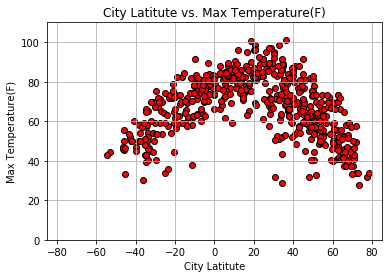

In [12]:
# Gettting lists of city latitudes and max temperature
city_lat = df["Lat"]
max_temp = df["Max Temp"]

# Creating scatter plot
plt.scatter(city_lat, max_temp, marker="o", facecolor="red",edgecolors="black")

# Assigning title, lables and setting x and y limits (Making plot look pretty)
plt.title("City Latitute vs. Max Temperature(F)")
plt.xlabel("City Latitute")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.xlim(-85,85)
plt.ylim(0,110)
plt.show()

City Latitude vs. Humidity

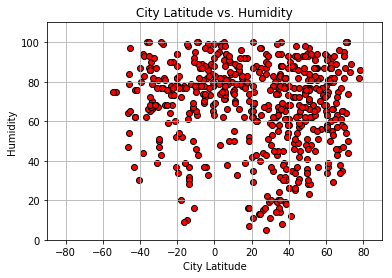

In [13]:
# Gettting lists of city latitudes and humidity
lat = df["Lat"]
hum = df["Humidity"]

# Build the scatter plots for each city types
plt.scatter(lat, hum, marker="o", facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlim(-90,90)
plt.ylim(0,110)
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity")
plt.show()

City Latitude vs. Cloudiness

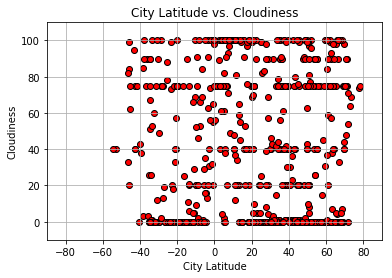

In [14]:
# Gettting lists of city latitudes and cloudiness
lat = df["Lat"]
cloud = df["Cloudiness"]

# Build the scatter plots for each city types
plt.scatter(lat, cloud, marker="o", facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlim(-90,90)
plt.ylim(-10,110)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.show()

City Latitude vs. Wind Speed

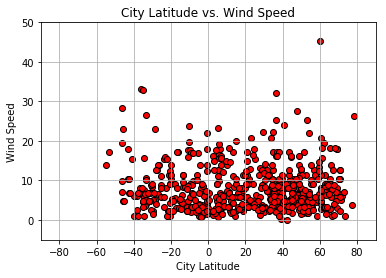

In [16]:
# Gettting lists of city latitudes Wind Speed
lat = df["Lat"]
wind = df["Wind Speed"]

# Build the scatter plots for each city types
plt.scatter(lat, wind, marker="o", facecolors="red", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlim(-90,90)
plt.ylim(-5,50)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.show()